In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.gridspec as gridspec
from wordcloud import WordCloud
from stop_words import get_stop_words


#---- LINEPLOT ----#

def get_estimate(sub, path, pal = 'default'):
    # Create main figure
    fig = plt.figure(figsize=(15,10))

    # Create Job df
    jobs_df = pd.read_excel('emplois_par_profession.xls')
    jobs_df = jobs_df.iloc[3:,:]
    jobs_df.columns = 'PROFESSION 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017'.split()
    if pal == 'default':
        sns.set()
    else:
        sns.set_palette(sns.color_palette(pal[0],pal[1]))
    
    sns.set_style('white')
    # Set context for times-series
    sns.set_context("paper")
    

    # Get only Jobs from a CNP subcat
    stratified_job_df = jobs_df.iloc[sub[0]:sub[1],:]
    stratified_job_df = stratified_job_df.replace('x', 0)
    
    # Plot Jobs estimate
    for x in range(len(stratified_job_df)):
        plt.plot(list(stratified_job_df.iloc[x].keys())[1:], list(stratified_job_df.iloc[x].values)[1:], 
                 label = list(stratified_job_df.iloc[x].values)[0],
                linewidth=2)

    plt.xlabel('Années', fontsize=14)
    plt.ylabel("Estimations du nombre d'emplois (en milliers)", fontsize=14)
    plt.title("Évolution du nombre d'emplois selon la profession", fontsize= 16, y = 1.035)
   
    
    plt.legend(frameon = False, fontsize=12)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.savefig(path, dpi = 300)


#---- BARPLOT ----#
    
def get_salary(sub, path, pal = 'default'):
    # Create main figure
    fig = plt.figure(figsize=(12,10))
    
    # Create Salary df
    salaires_df = pd.read_excel("salaires_par_profession.xlsx")
    salaires_df = salaires_df.iloc[3:, :]
    salaires_df.columns = 'PROFESSION 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017'.split()
   
    # Set context for barplot
    
    if pal == 'default':
        sns.set(style="darkgrid")
    else:
        sns.set_palette(sns.color_palette(pal[0],pal[1]))

    # Get only Salary from a CNP subcat
    stratified_salary_df = salaires_df.iloc[sub[0]:sub[1],:]
    
    # Create new df to populate
    df = pd.DataFrame(index = range(len(stratified_salary_df)*4), columns = ['Années', 'Salaires', 'Profession'])

    for x in range(len(stratified_salary_df)):

        mean_2000_2004 = np.mean([e for e in list(stratified_salary_df.iloc[x].iloc[:5][1:].values) if isinstance(e, float)])
        mean_2005_2009 = np.mean([e for e in list(stratified_salary_df.iloc[x].iloc[5:10][1:].values) if isinstance(e, float)])
        mean_2010_2015 = np.mean([e for e in list(stratified_salary_df.iloc[x].iloc[10:15][1:].values) if isinstance(e, float)])
        mean_2015_2017 = np.mean([e for e in list(stratified_salary_df.iloc[x].iloc[15:][1:].values) if isinstance(e, float)])

        df['Années'][x*4:(x*4)+4] = ['2000-2004', '2005-2009', '2010-2015', '2015-2017']
        df['Salaires'][x*4:(x*4)+4] = [mean_2000_2004,mean_2005_2009,mean_2010_2015,mean_2015_2017]
        df['Profession'][x*4:(x*4)+4] = stratified_salary_df.iloc[x].loc['PROFESSION']
    
    sns.barplot(y = 'Profession', x ='Salaires', hue='Années', data = df, orient = 'h')
    plt.title("Évolution du taux de salaire \nhoraire moyen selon le CNP", fontsize = 16, y = 1.025, loc='left')
    plt.xlabel('Taux de salaire horaire moyen', fontsize=14)
    plt.ylabel('Professions (avec code CNP)', fontsize=14)
    plt.legend(frameon = False, fontsize=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(path, dpi = 300)
    
#---- PATHPLOT ----#
    
def get_gender_gap(sub, path, pal = 'default'):
    # Create main figure
    fig = plt.figure(figsize=(15,8))
    if pal == 'default':
        sns.set(style="darkgrid")
    else:
        sns.set_palette(sns.color_palette(pal[0],pal[1]))
    # Get total df
    total_df = pd.read_excel('professions_les_deux_sexes.xlsx')
    total_df = total_df.iloc[3:,:]
    total_df.columns = 'PROFESSION 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017'.split()
    total_df = total_df.replace('x', 0)

    # Get man df
    man_df = pd.read_excel('professions_hommes.xlsx')
    man_df = man_df.iloc[3:,:]
    man_df.columns = 'PROFESSION 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017'.split()
    man_df = man_df.replace('x', 0)

    # Get only Jobs from a CNP subcat
    strat_total_df = total_df.iloc[sub[0]:sub[1],:]
    strat_man_df = man_df.iloc[sub[0]:sub[1],:]

    # Get Woman by substraction
    strat_girl_df = strat_total_df.iloc[:,1:]-strat_man_df.iloc[:,1:]

    # Replace 0 by x (get into filter and not computed in the mean)
    strat_man_df = strat_man_df.replace(0, 'x')
    strat_girl_df = strat_girl_df.replace(0, 'x')

    for x in range(len(strat_man_df)):
        str_x = list(strat_man_df.iloc[x,:][
                list(map(lambda y: isinstance(strat_man_df.iloc[x,:][y], str) == False, range(len(strat_man_df.iloc[x,:].values))))
            ].keys())

        str_y = list(strat_man_df.iloc[x,:][
                list(map(lambda y: isinstance(strat_man_df.iloc[x,:][y], str) == False, range(len(strat_man_df.iloc[x,:].values))))
            ].values)

        fig.add_subplot(121)
        try:
            sns.regplot(x = np.array(list(map(lambda x: int(str_x[x]), range(len(str_x))))), 
                        y = np.array(list(map(lambda x: float(str_y[x]), range(len(str_y))))), color=sns.color_palette("Set1", 7)[x], marker='o', order=2, ci=None, truncate=True,
                       label='{}'.format(strat_man_df.iloc[x].loc['PROFESSION']))
        except:
            pass

    
        plt.legend(frameon = False, fontsize=14, bbox_to_anchor=(-0.05, 1))
        ylim = np.array(plt.ylim)
        plt.ylabel("Estimations du nombre d'emplois (en milliers)", fontsize=14)
        plt.xticks(rotation=45, fontsize=14)
        plt.yticks(fontsize=14)
        plt.title('Hommes', fontsize = 14)
        
    for x in range(len(strat_man_df)):


        str_g_x = list(strat_girl_df.iloc[x,:][
                list(map(lambda y: isinstance(strat_girl_df.iloc[x,:][y], str) == False, range(len(strat_girl_df.iloc[x,:].values))))
            ].keys())

        str_g_y = list(strat_girl_df.iloc[x,:][
                list(map(lambda y: isinstance(strat_girl_df.iloc[x,:][y], str) == False, range(len(strat_girl_df.iloc[x,:].values))))
            ].values)
        fig.add_subplot(122)
        try:
            sns.regplot(x = np.array(list(map(lambda x: int(str_g_x[x]), range(len(str_g_x))))), 
                        y = np.array(list(map(lambda x: float(str_g_y[x]), range(len(str_g_y))))), color=sns.color_palette("Set1", 7)[x], marker='o', order=2, ci=None, truncate=True,
                       label = '{} - Femmes'.format(strat_man_df.iloc[x].loc['PROFESSION']))
        except:
            pass
        plt.xlabel("Années", fontsize = 14)
        plt.ylim = ylim
        ax = plt.gca()
        ax.xaxis.set_label_coords(1.05, -0.05)
        plt.title('Femmes', fontsize = 14)
        
        plt.xticks(rotation=45, fontsize=14)
        plt.yticks(fontsize=14)
    
    plt.suptitle("Évolution du nombre d'emplois occupés par un homme et une femme selon le CNP", fontsize=16, y = 1.05)
    plt.tight_layout()
    plt.savefig(path, dpi=500, bbox_inches='tight')

#---- WORDCLOUD ----#
    
def get_word_cloud(path, id_l):
    for x in range(len(id_l)):
        f = open('{}/{}.txt'.format(path, id_l[x]), 'r').read()
        f = f.replace('\n', ' ')
        f = f.replace(' - ', ' ')
        f = f.replace(' – ', ' ')
        f = f.replace('/', ' ')
        f_splited = f.split()
        new_l = []

        stop_words = get_stop_words('fr')

        for y in range(len(f_splited)):
            if f_splited[y] not in stop_words:
                new_l.append(f_splited[y])

        f = ' '.join(new_l)

        wordcloud = WordCloud(width=3200, height=1600, background_color="white").generate(f)

        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.savefig('{}/{}.png'.format(path, id_l[x]), dpi=300)

# GET CNP0s

C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


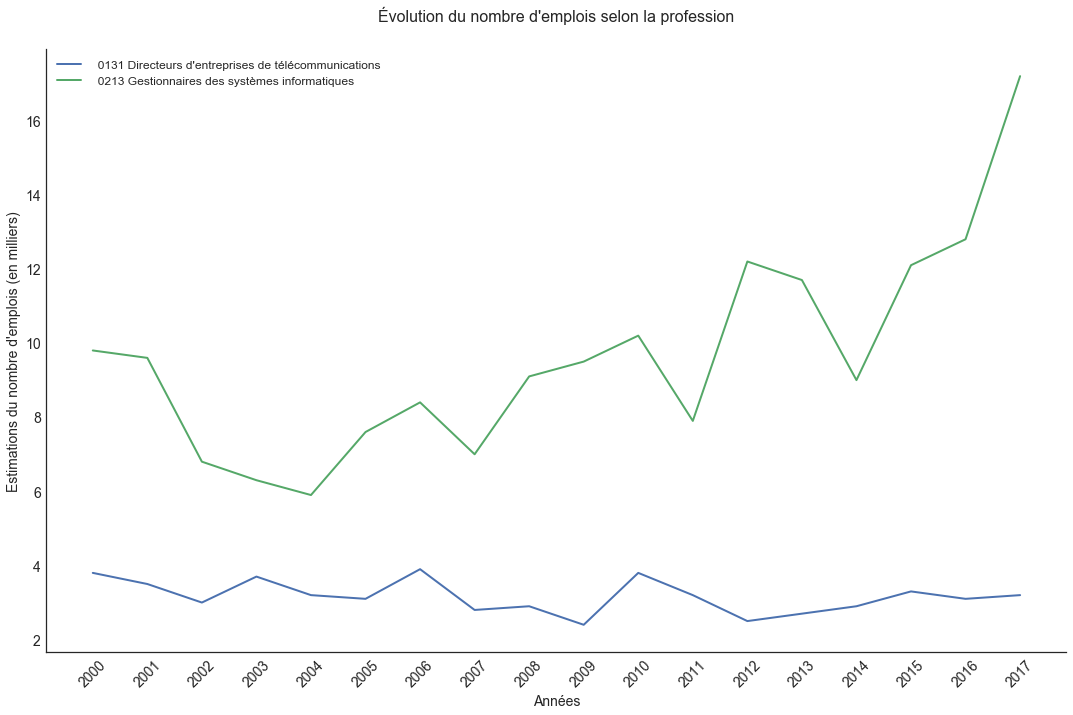

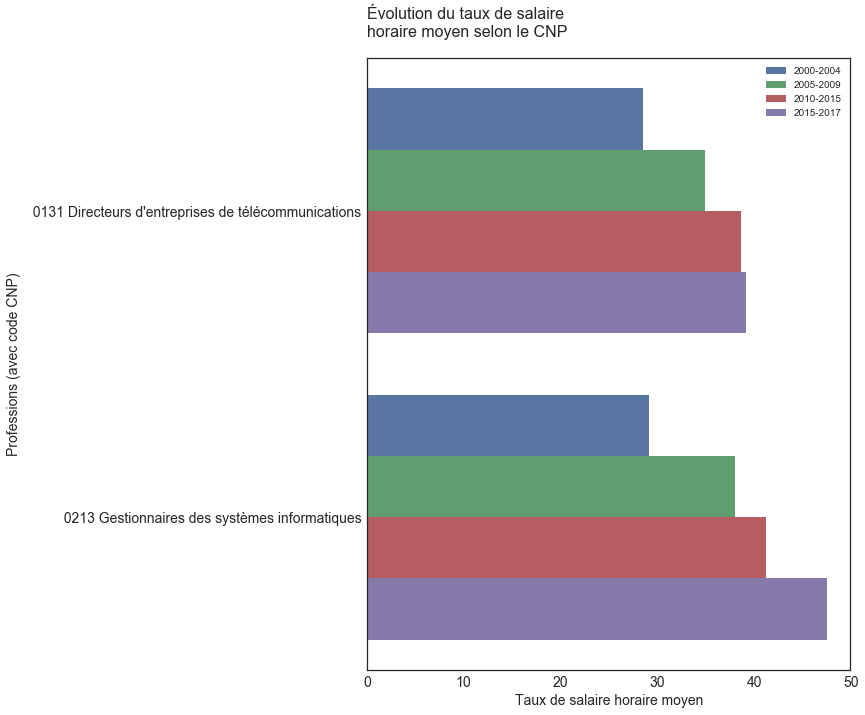

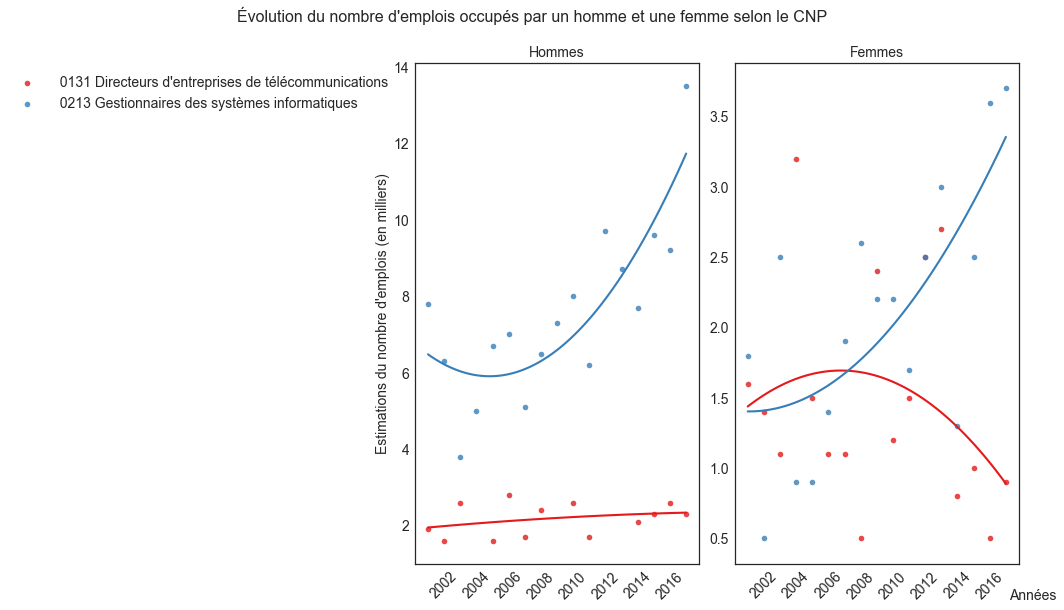

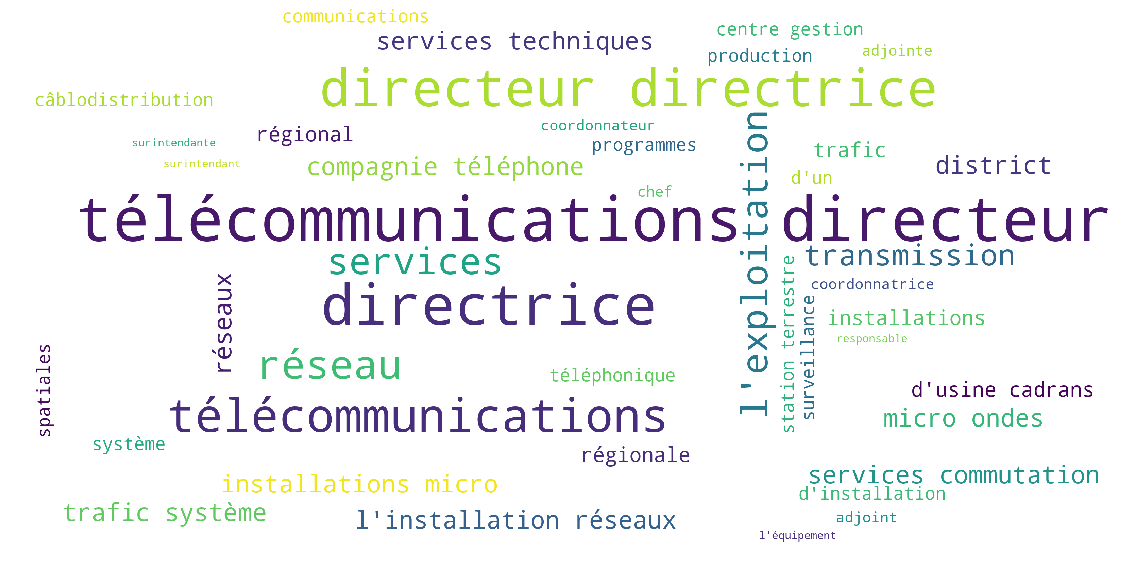

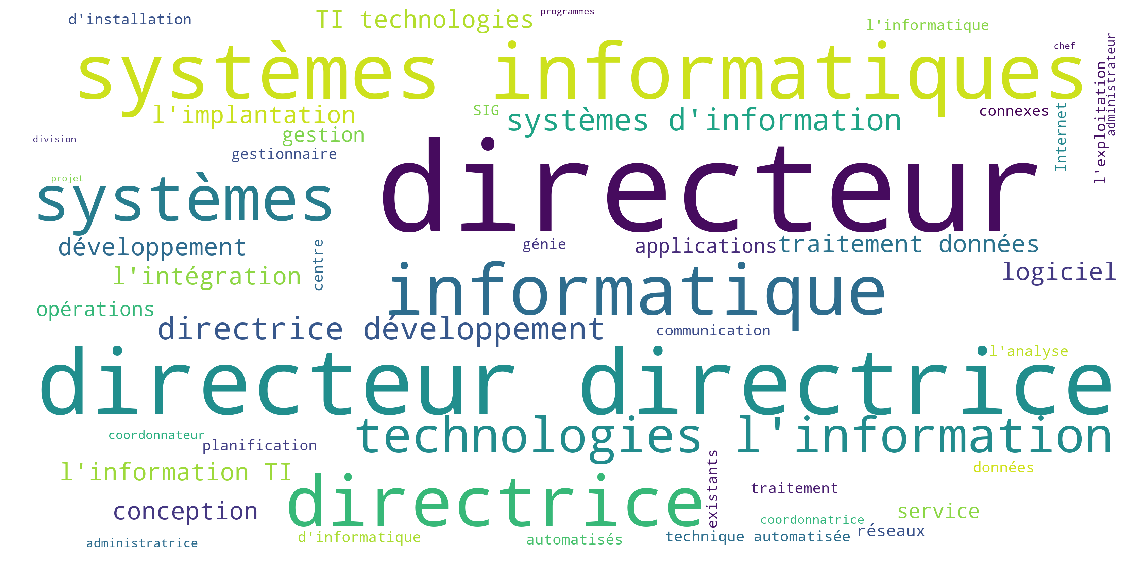

In [176]:
get_estimate(sub = [0,2], path = 'CNP0/emplois', pal=('deep', 8))
get_salary(sub = [0,2], path = 'CNP0/salaires', pal=('deep', 8))
get_gender_gap(sub = [0,2], path = 'CNP0/hommes-femmes', pal=('deep', 8))
get_word_cloud(path='CNP0', id_l=['0131', '0213'])

# GET CNP2-1s

C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


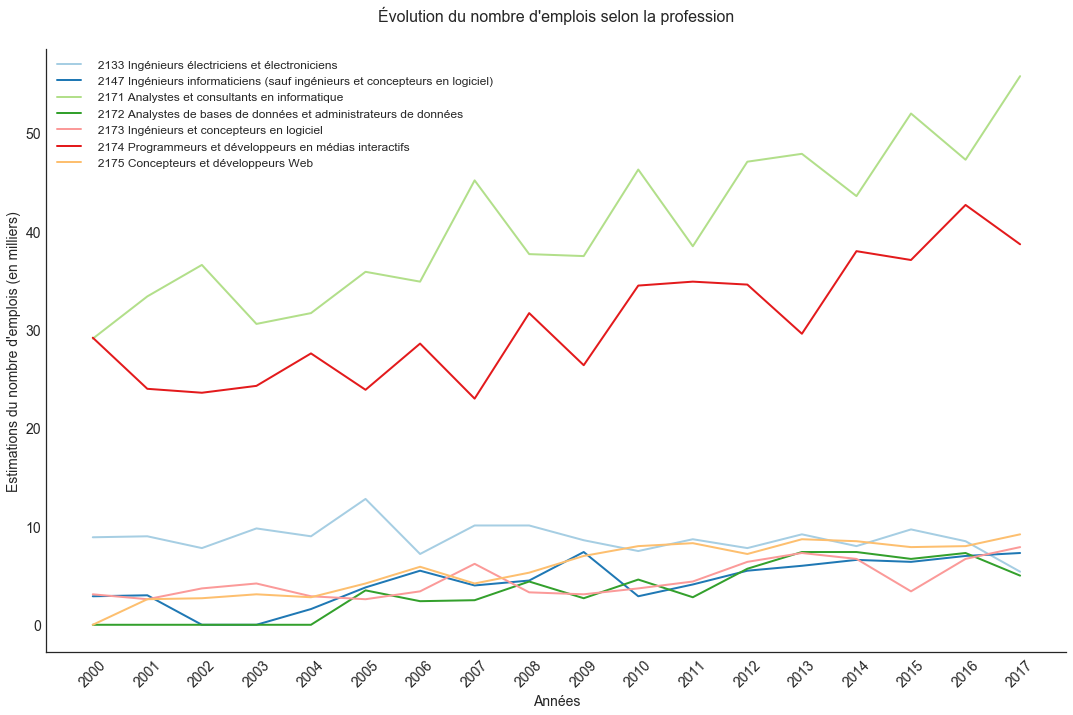

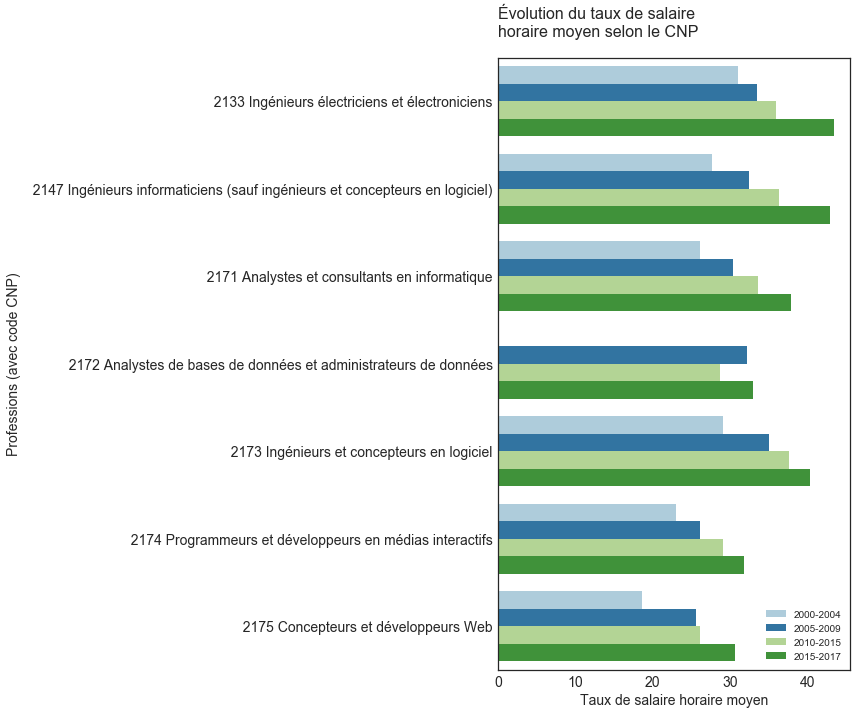

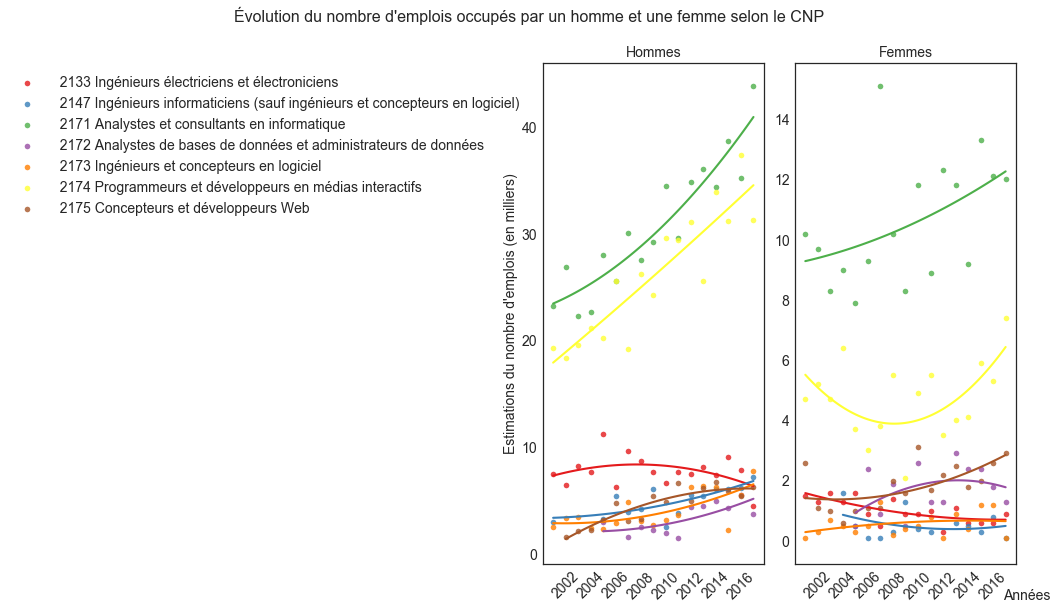

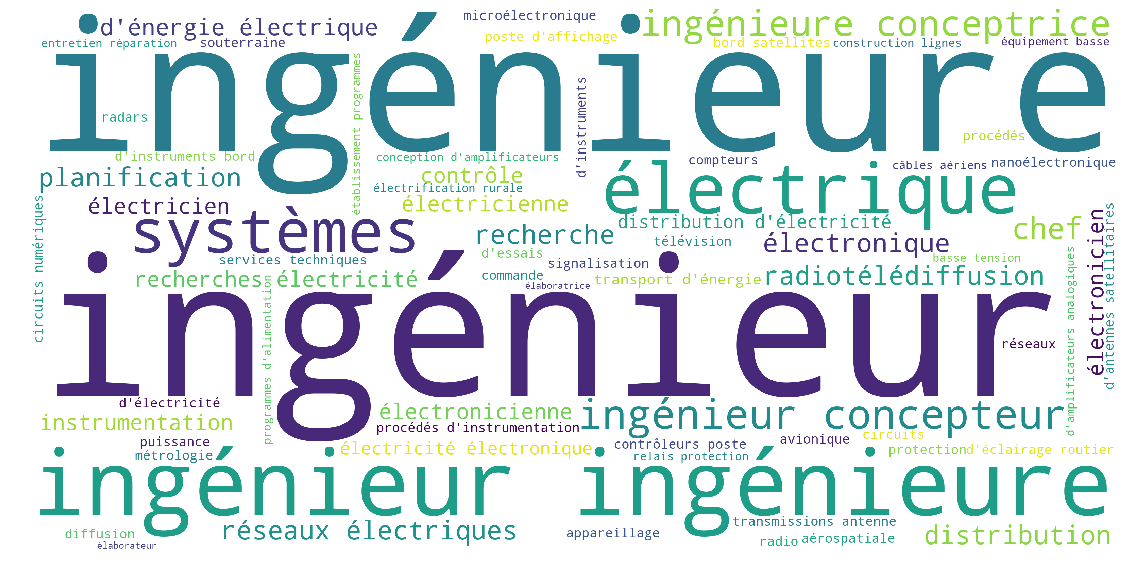

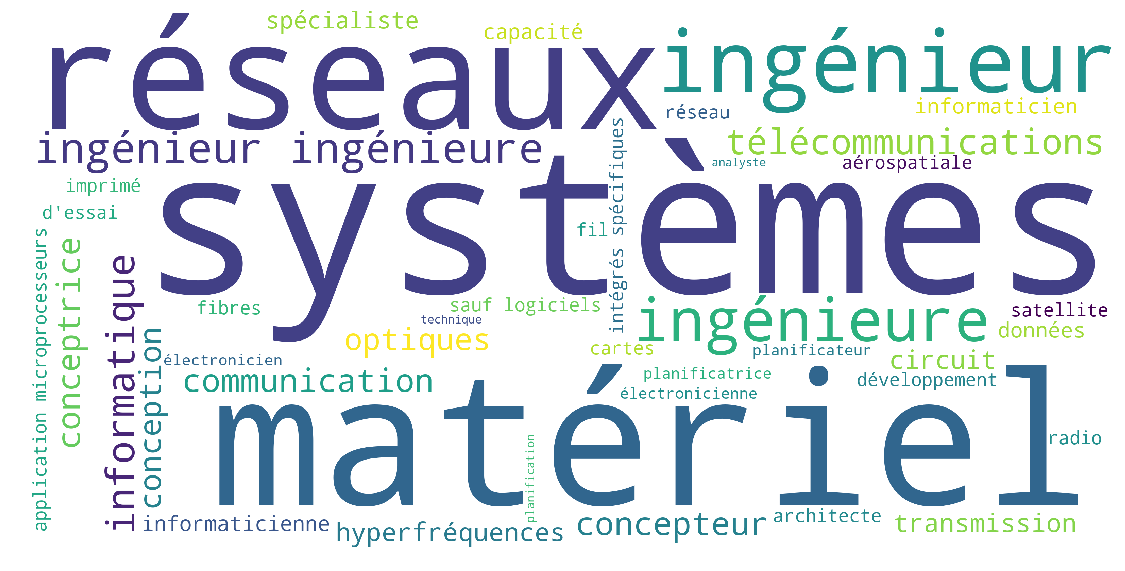

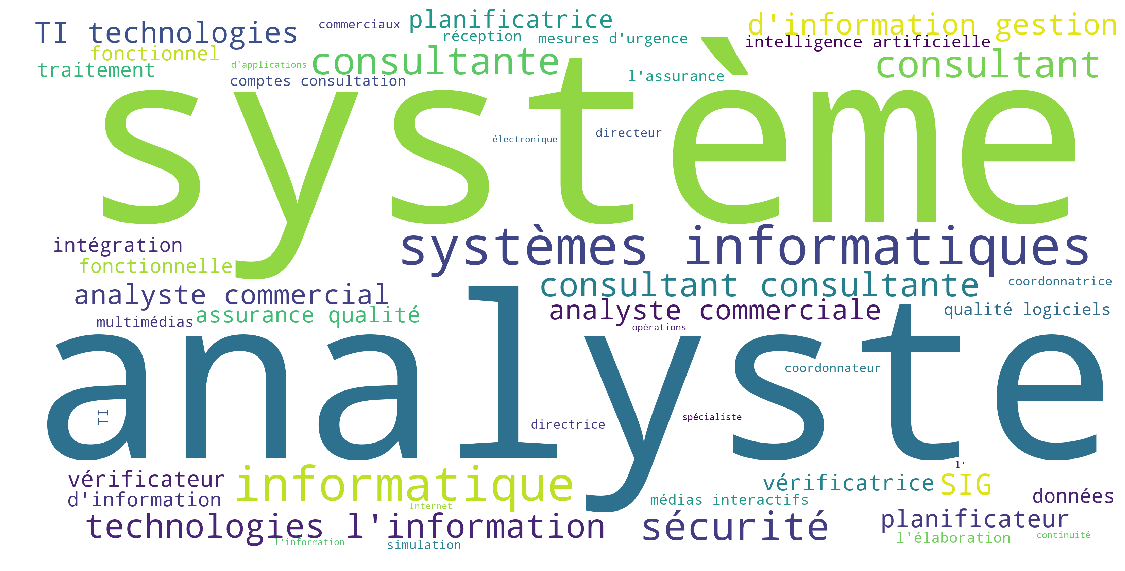

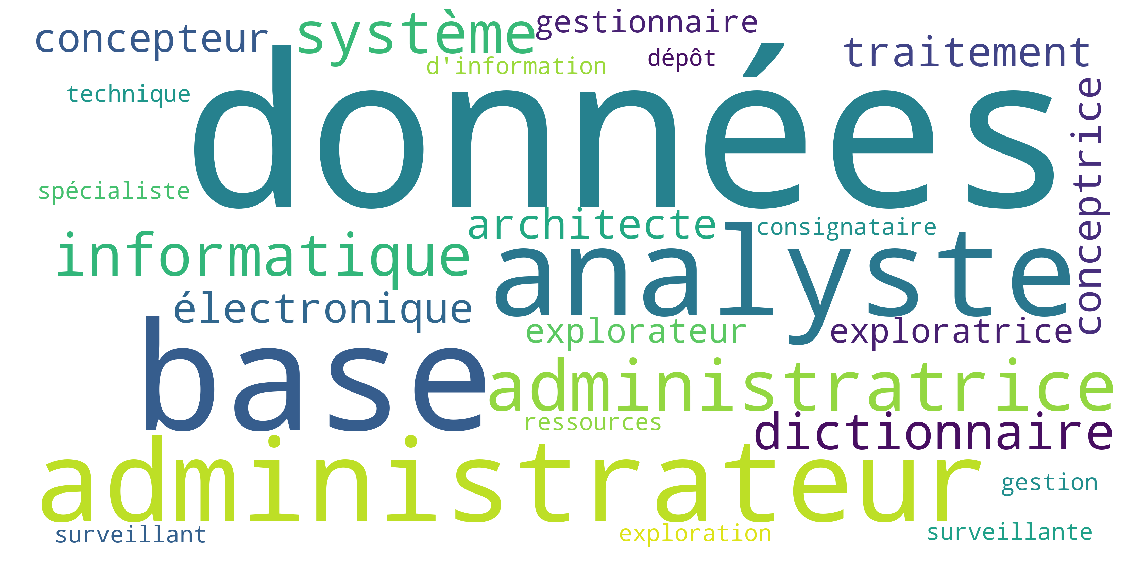

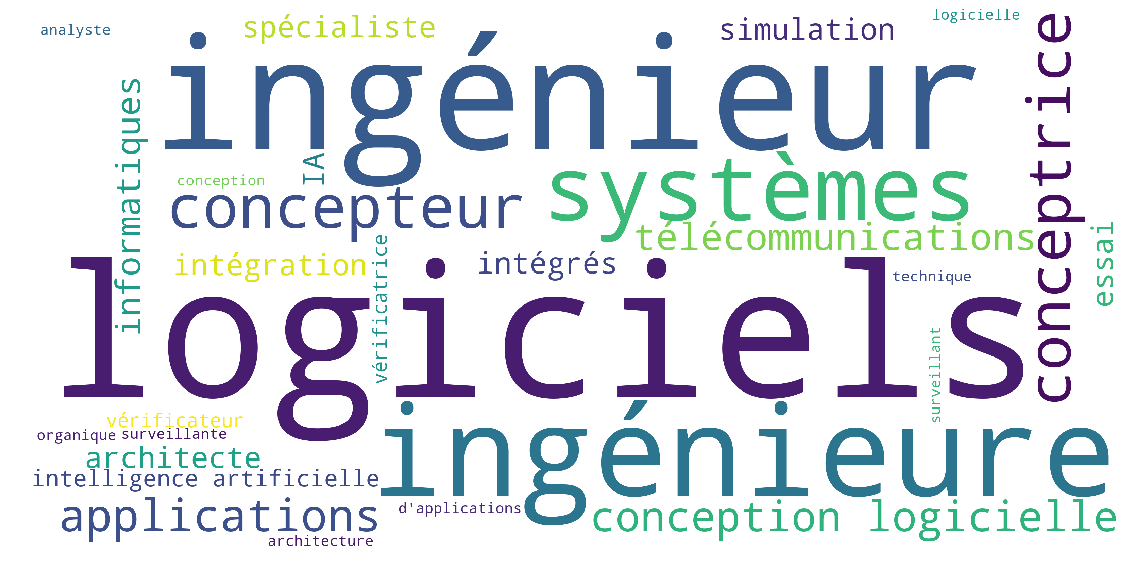

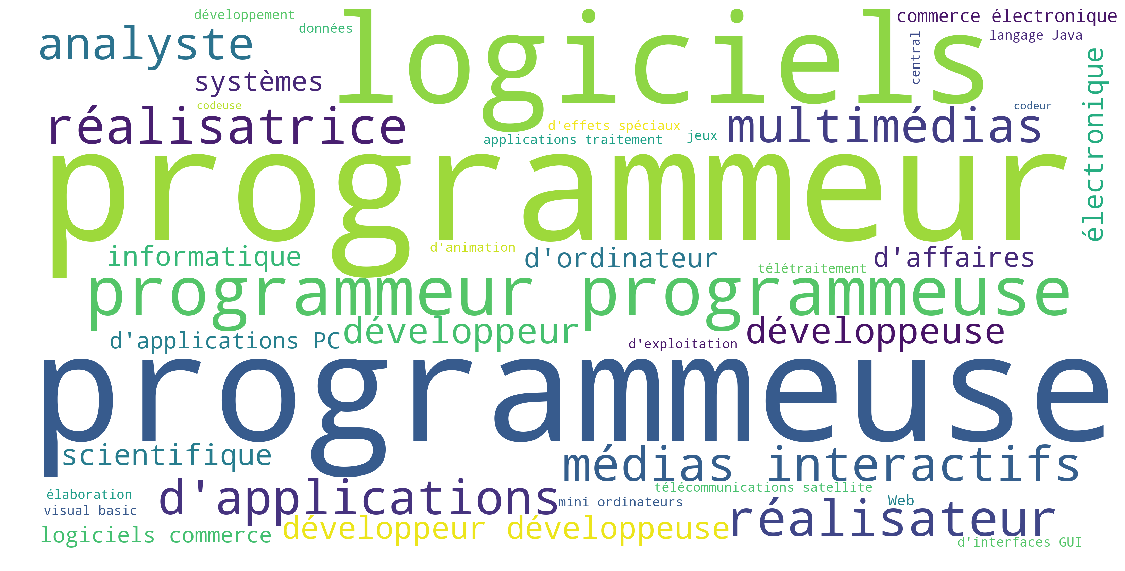

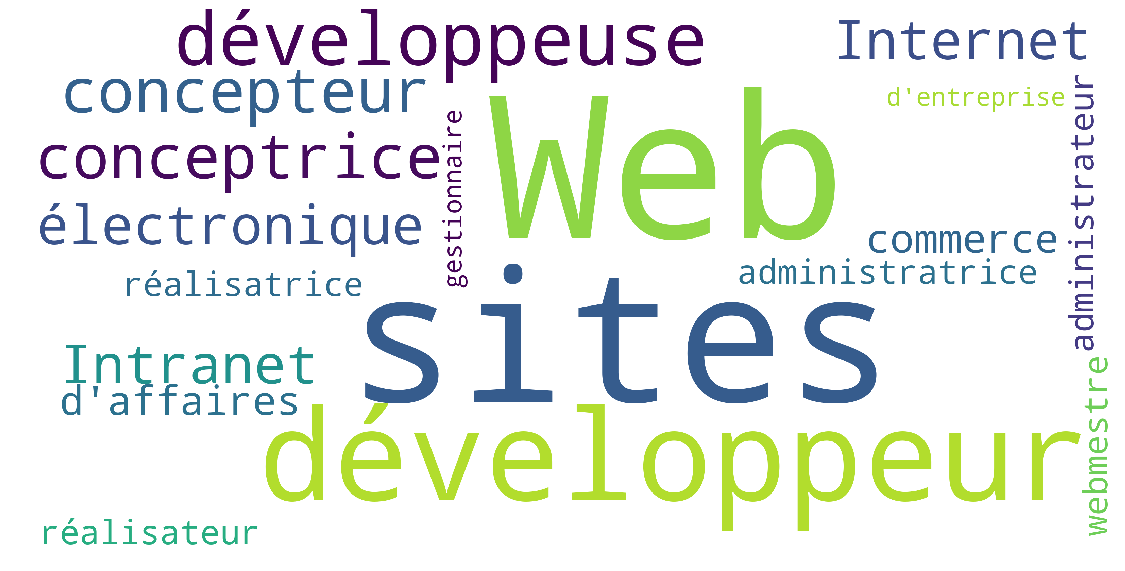

In [177]:
get_estimate(sub = [2,9], path = 'CNP2-1/emplois', pal=('Paired', 8))
get_salary(sub = [2,9], path = 'CNP2-1/salaires', pal=('Paired', 8))
get_gender_gap(sub = [2,9], path = 'CNP2-1/hommes-femmes', pal=('Paired', 8))
get_word_cloud(path='CNP2-1', id_l=['2133', '2147', '2171', '2172', '2173', '2174', '2175'])

# GET CNP2-2s

C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


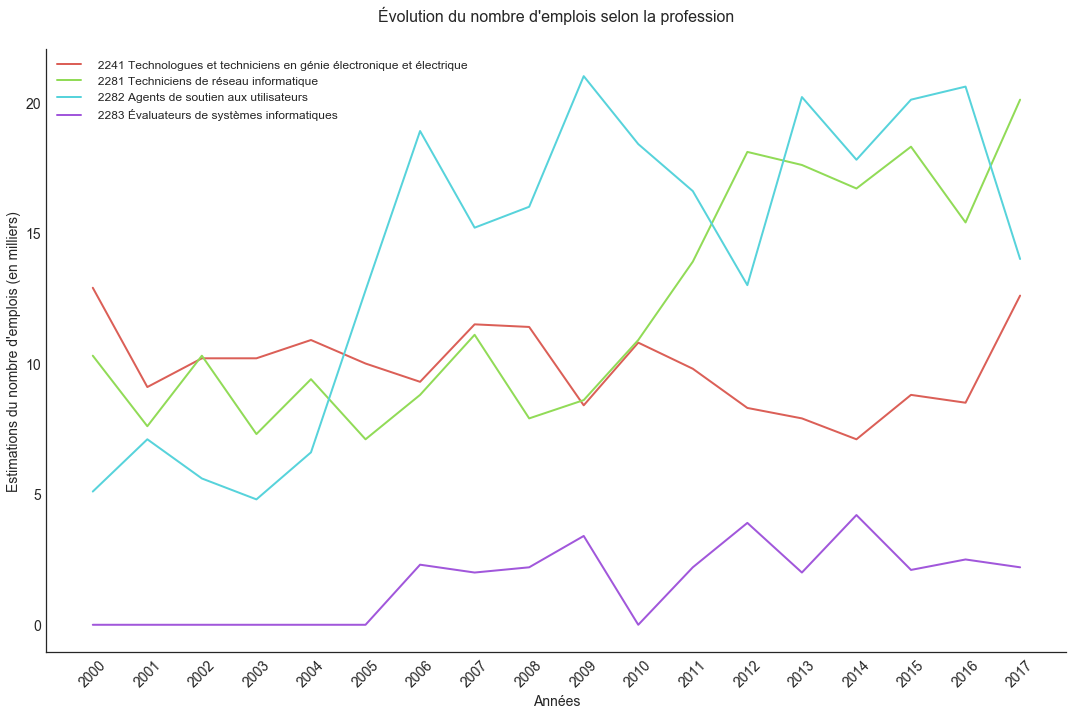

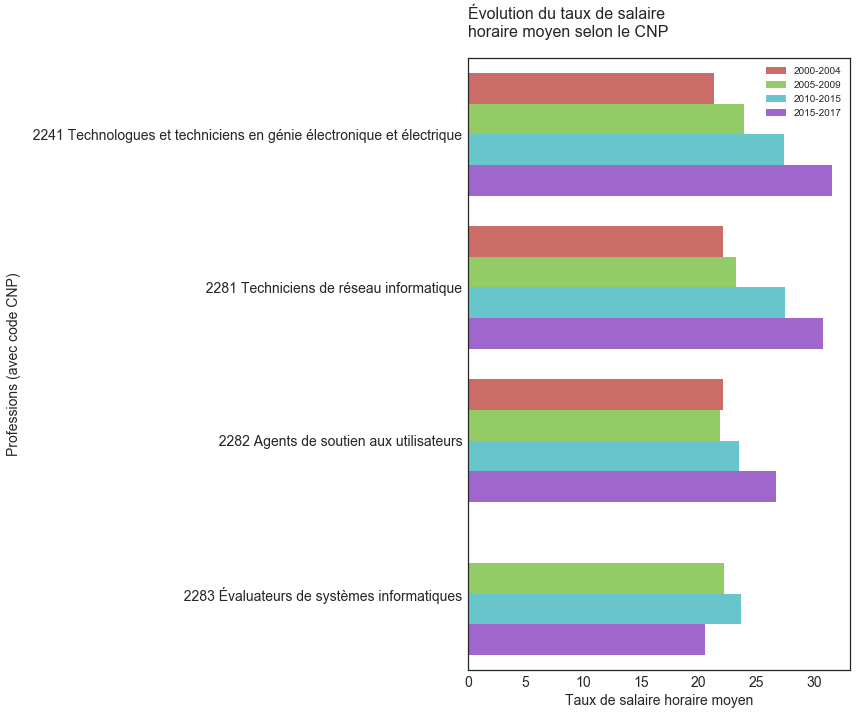

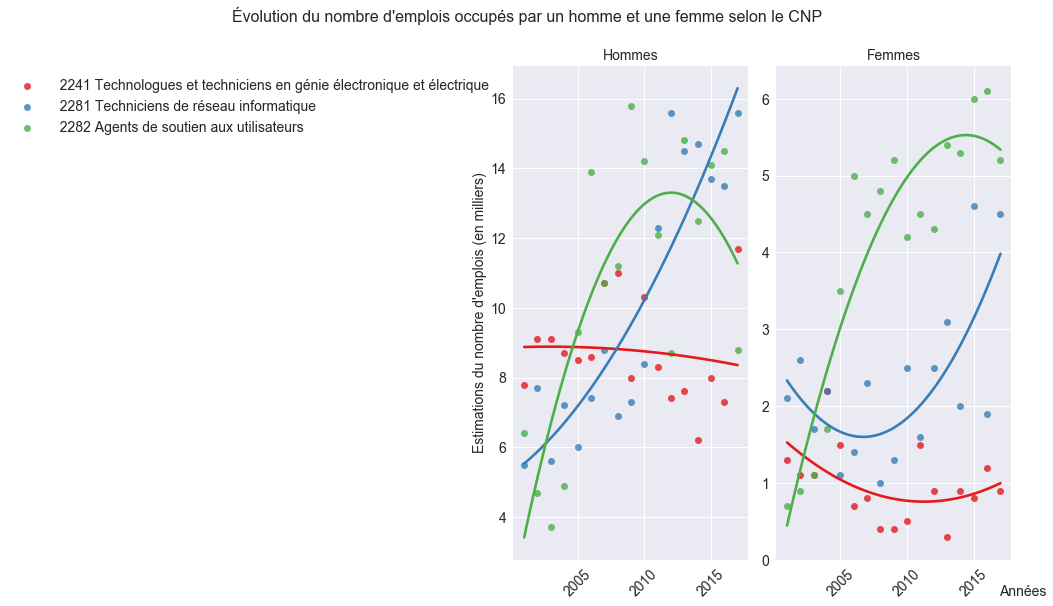

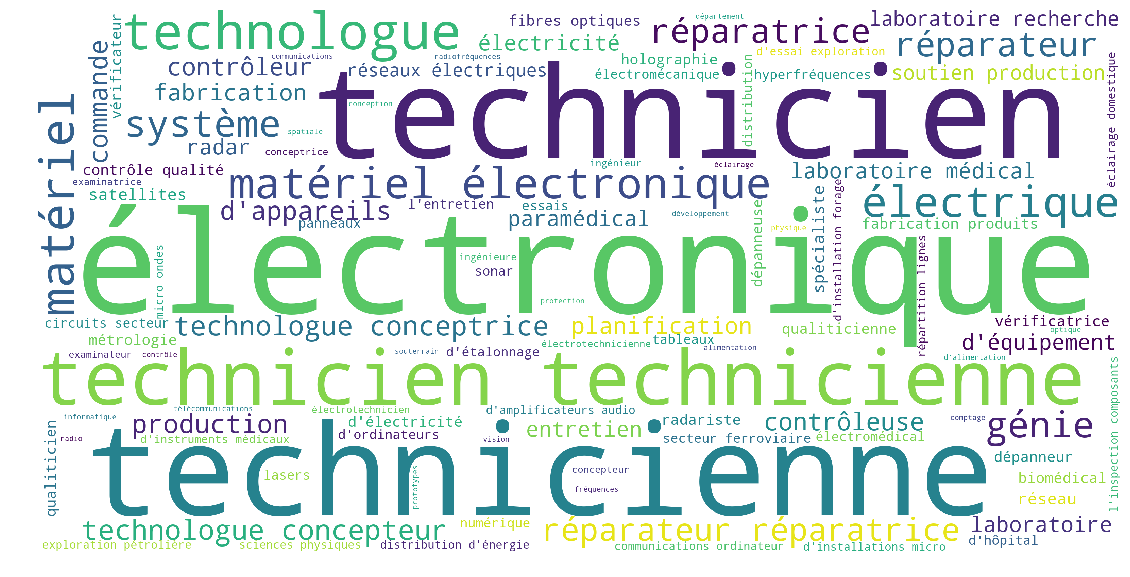

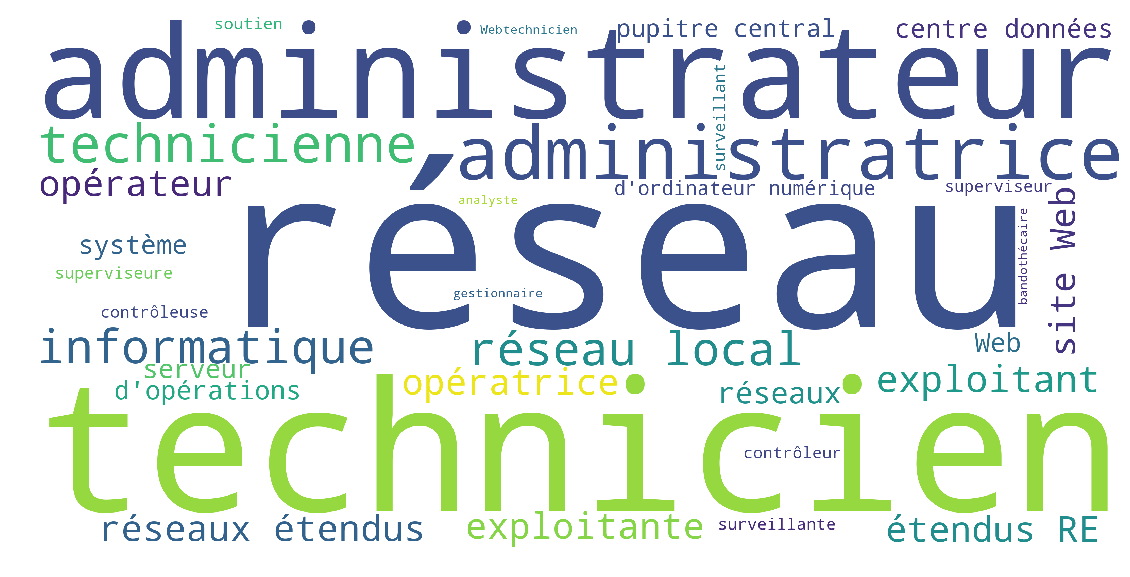

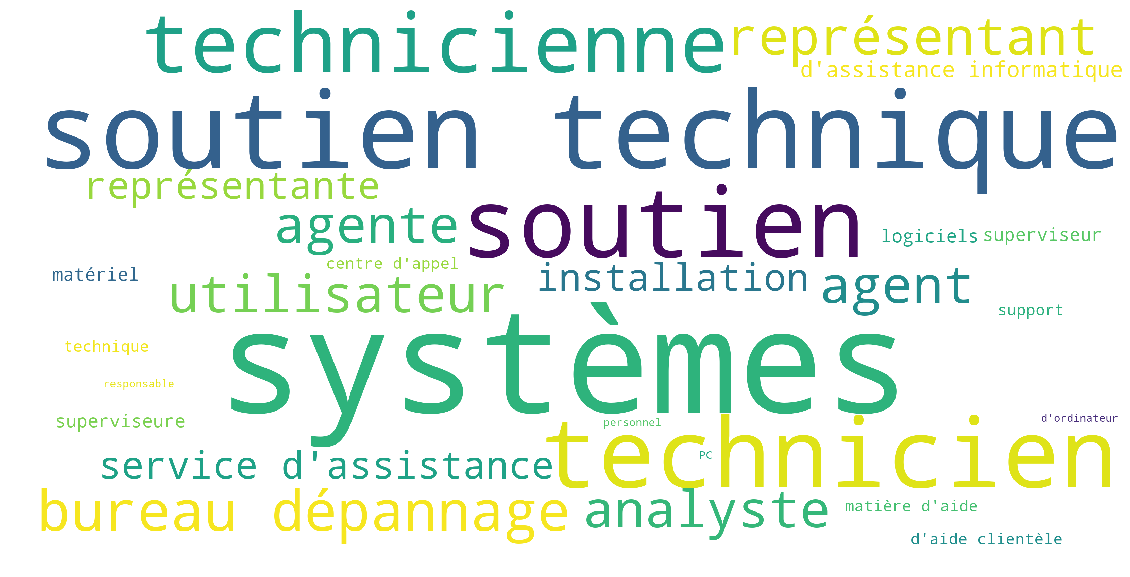

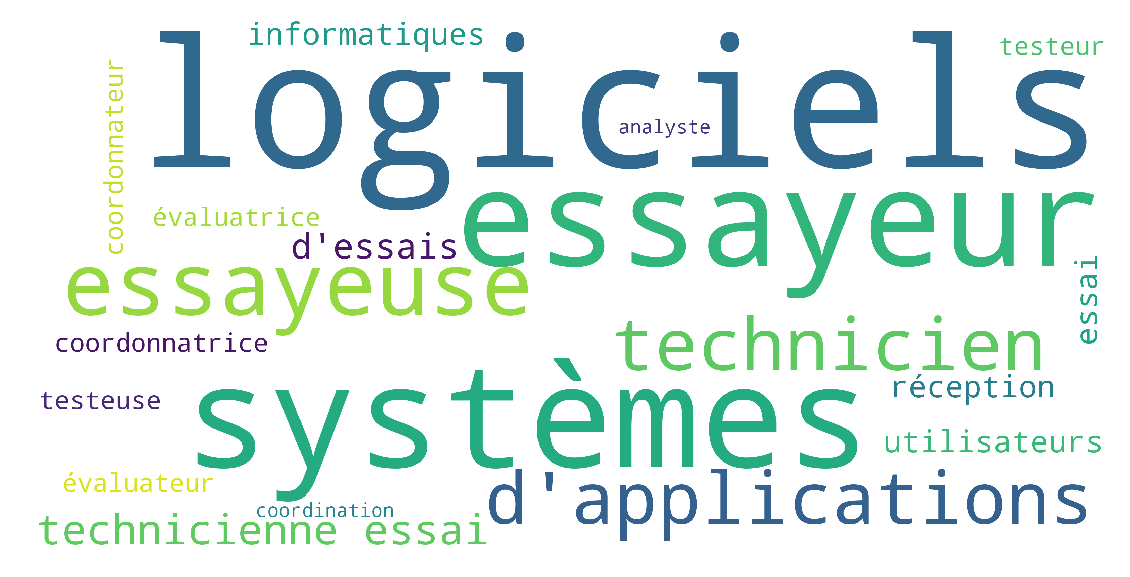

In [9]:
get_estimate(sub = [9,13], path = 'CNP2-2/emplois', pal=('hls', 4))
get_salary(sub = [9,13], path = 'CNP2-2/salaires', pal=('hls', 4))
get_gender_gap(sub = [9,12], path = 'CNP2-2/hommes-femmes')
get_word_cloud(path='CNP2-2', id_l=['2241', '2281', '2282', '2283'])

# GET CNP5s

C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


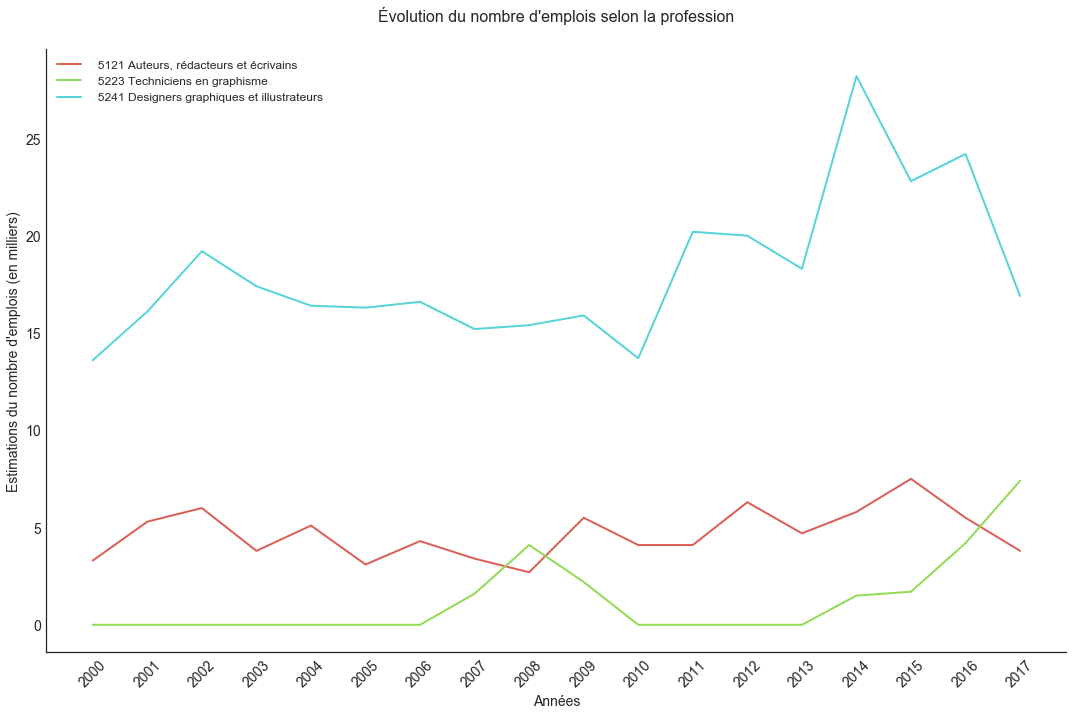

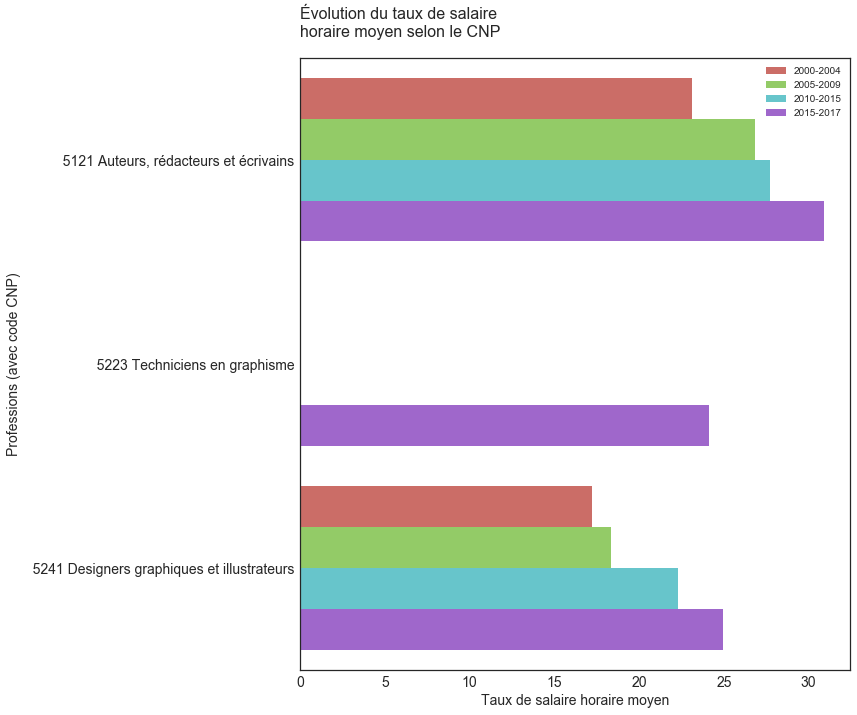

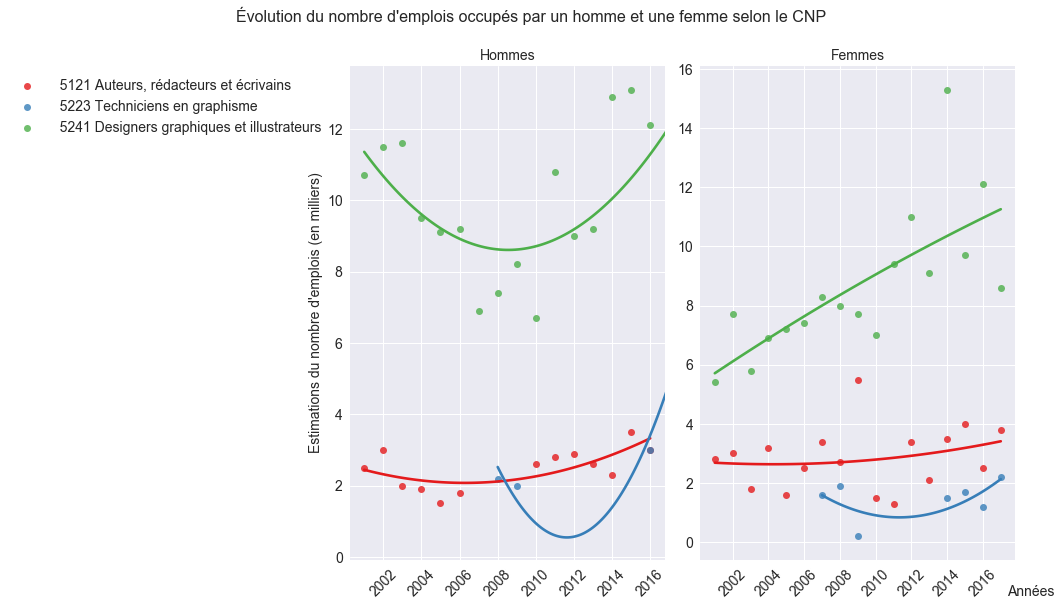

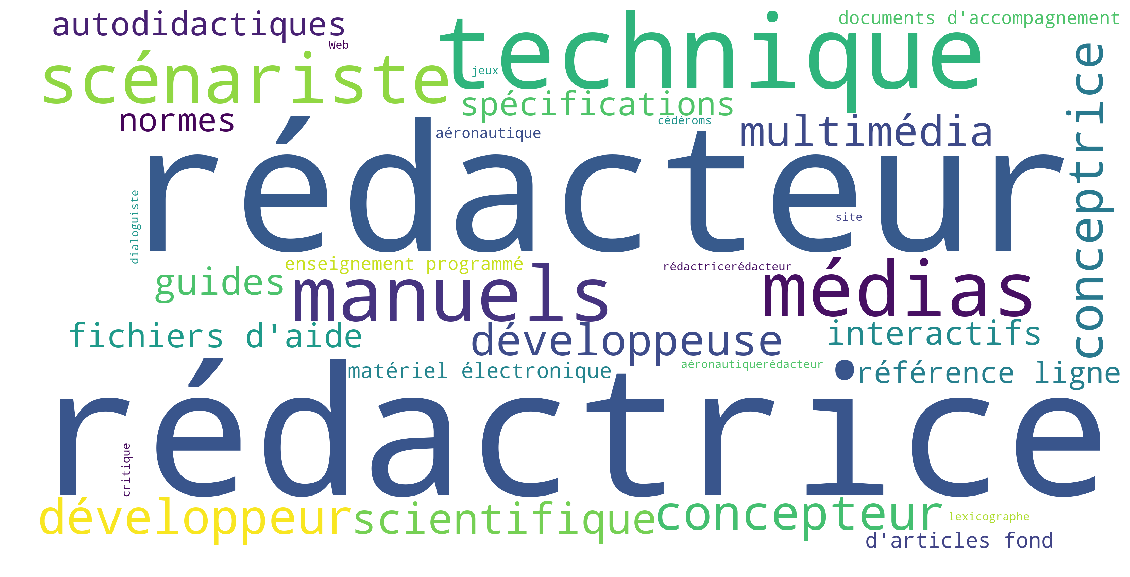

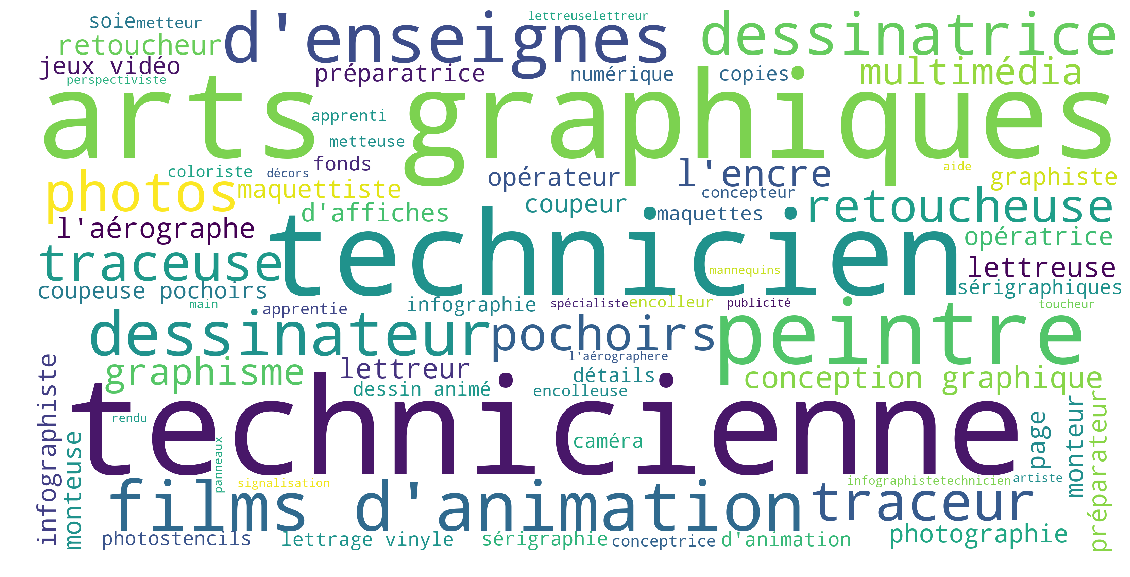

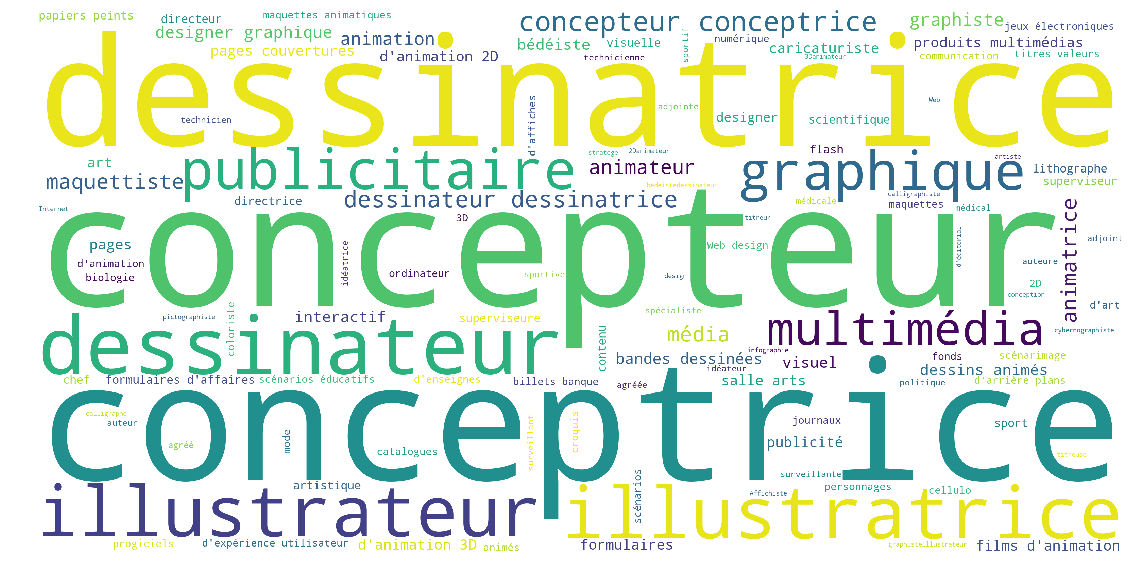

In [187]:
get_estimate(sub = [13,16], path = 'CNP5/emplois', pal=('hls', 4))
get_salary(sub = [13,16], path = 'CNP5/salaires', pal=('hls', 4))
get_gender_gap(sub = [13,16], path = 'CNP5/hommes-femmes')
get_word_cloud(path='CNP5', id_l=['5121', '5223', '5241'])

# GET CNP7s

C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\AubertSigouin-Lebel\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)


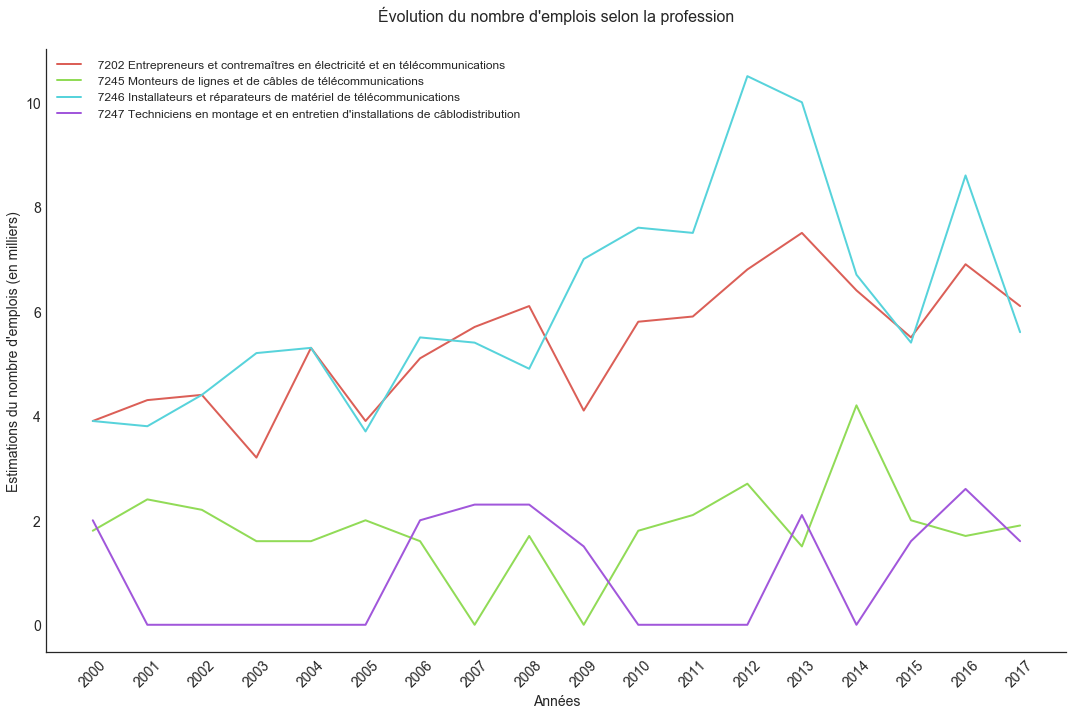

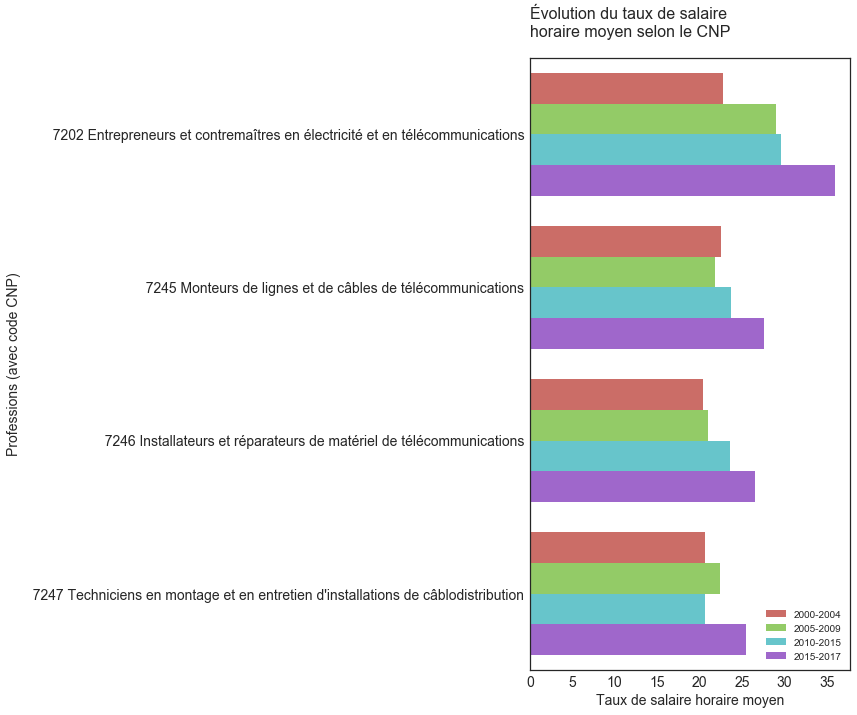

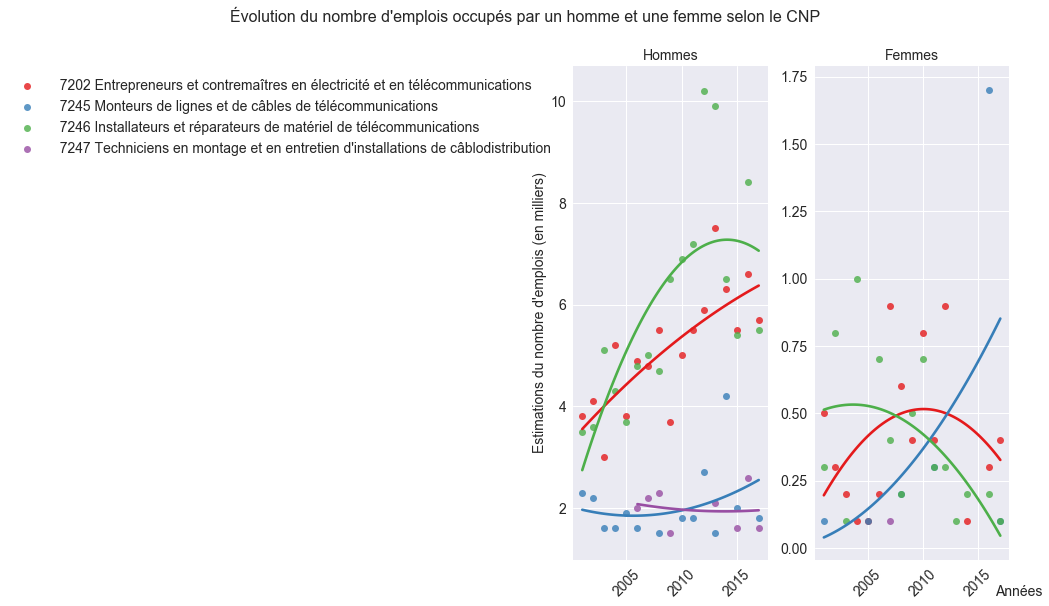

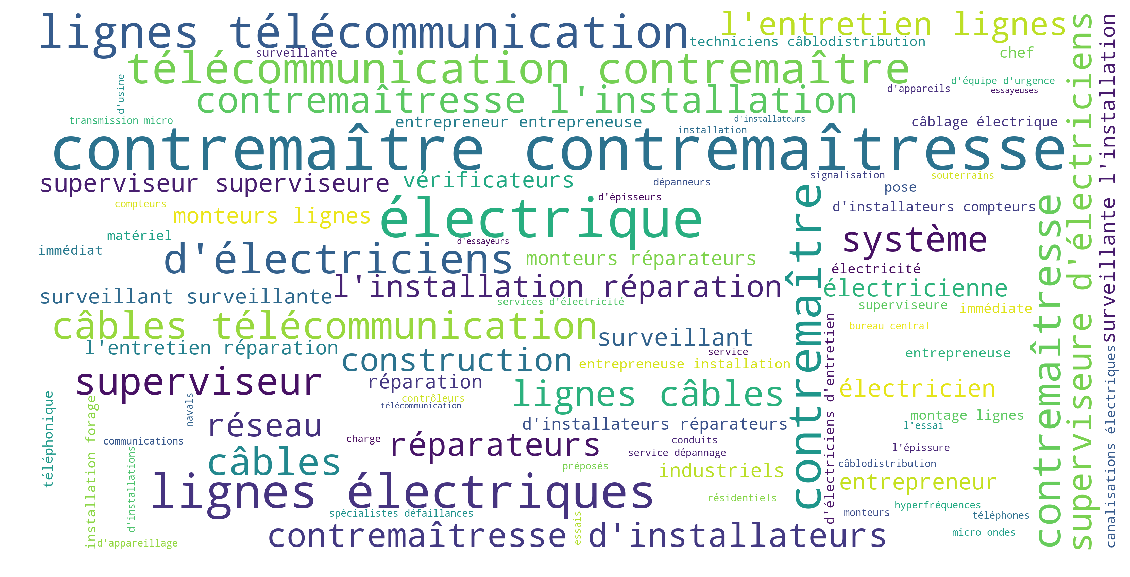

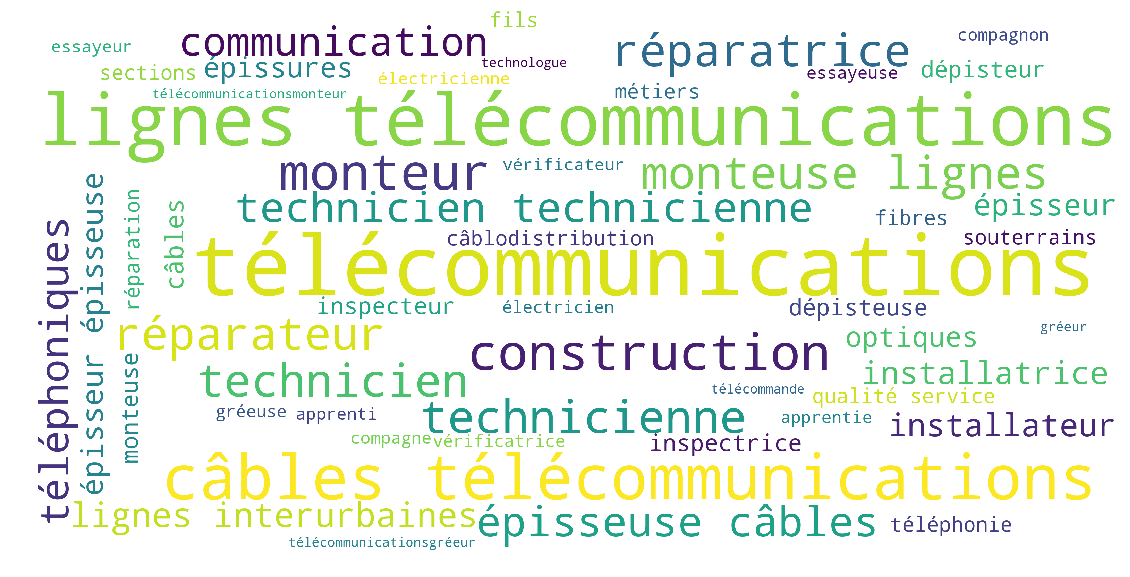

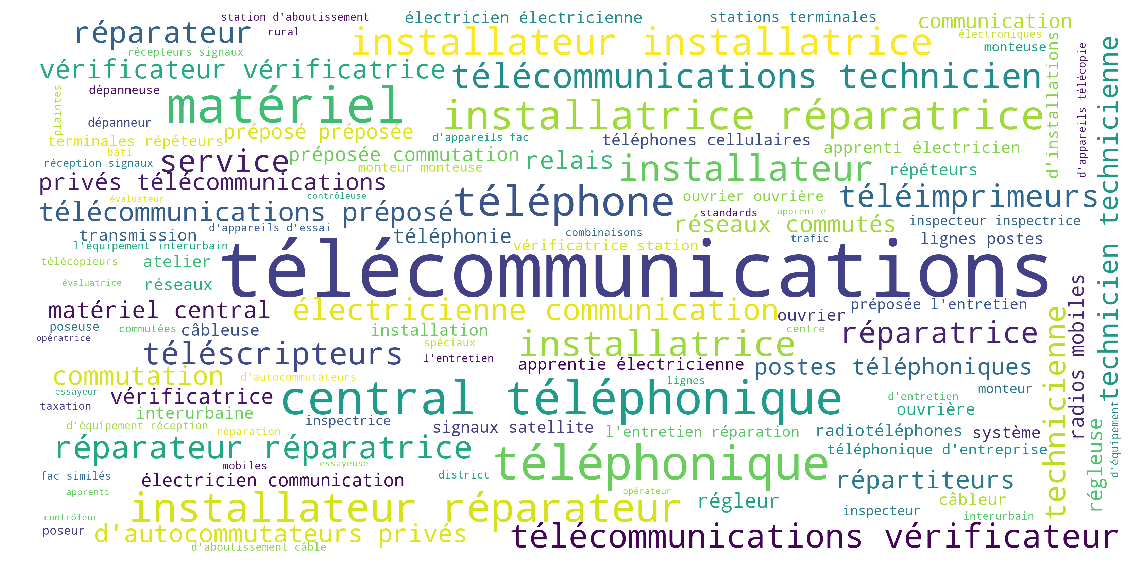

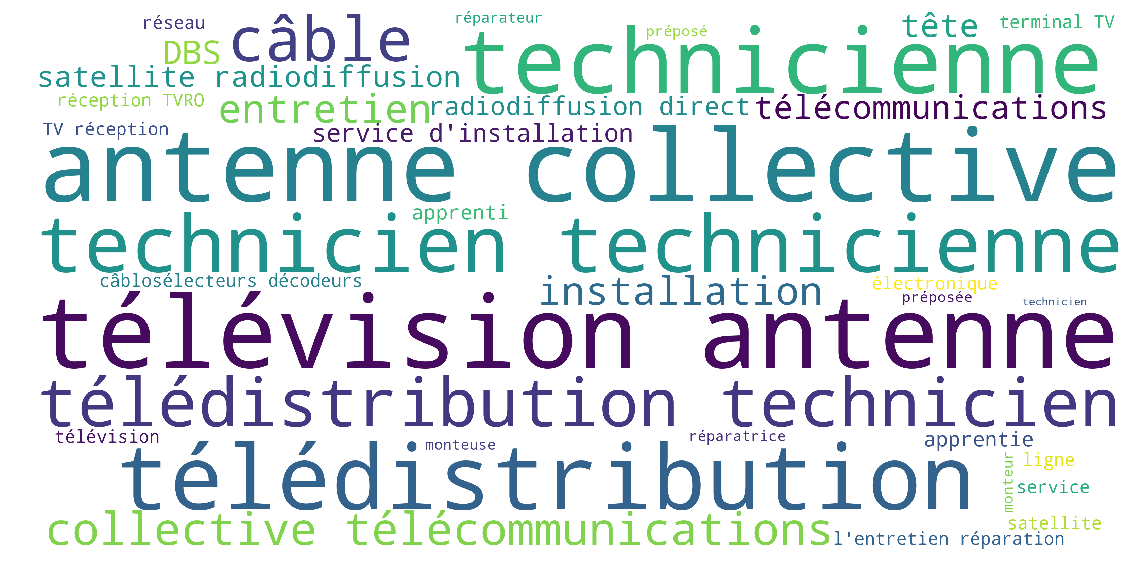

In [188]:
get_estimate(sub = [16,20], path = 'CNP7/emplois', pal=('hls', 4))
get_salary(sub = [16,20], path = 'CNP7/salaires', pal=('hls', 4))
get_gender_gap(sub = [16,20], path = 'CNP7/hommes-femmes')
get_word_cloud(path='CNP7', id_l=['7202', '7245', '7246', '7247'])

# GET CNP9s

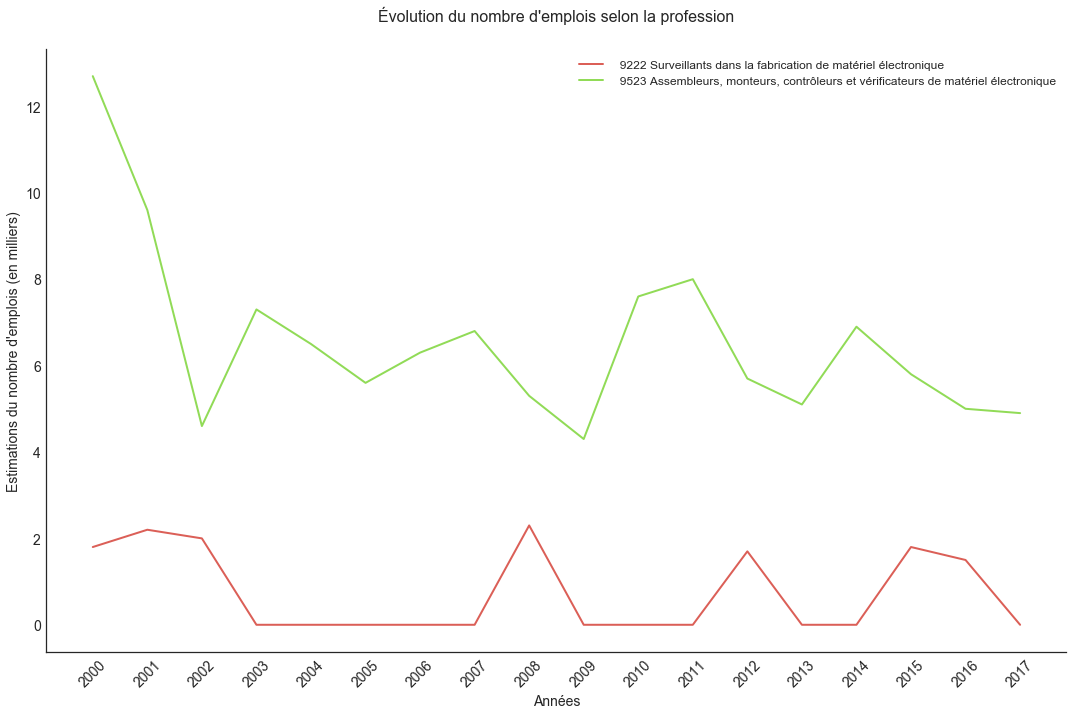

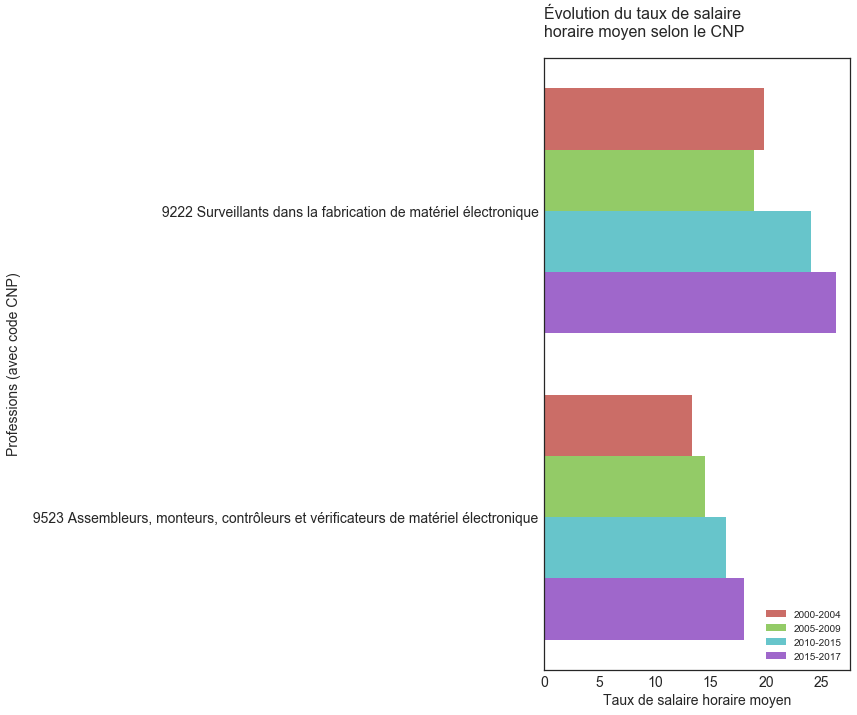

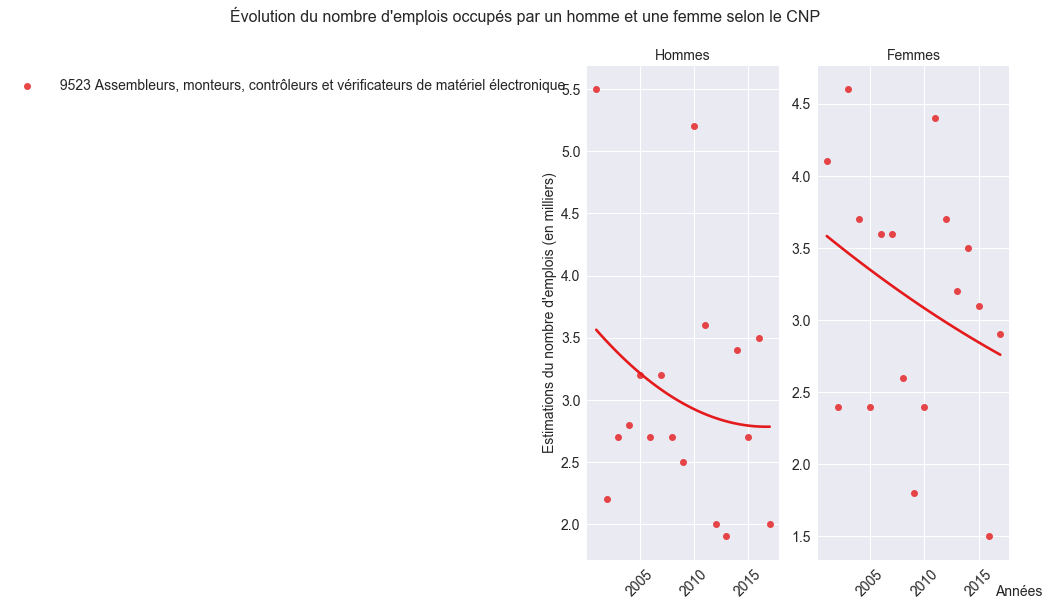

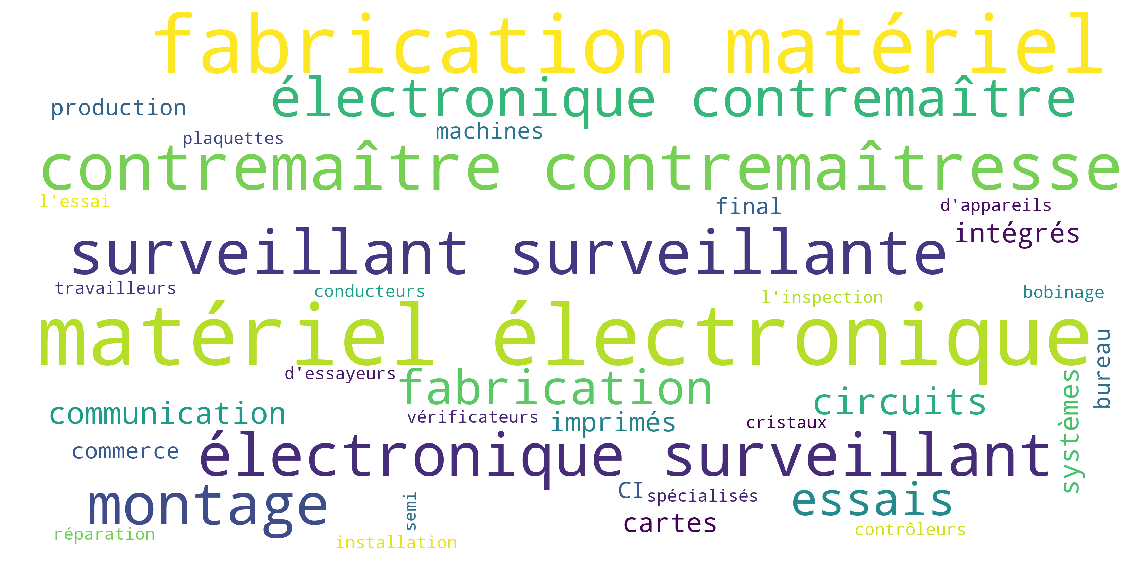

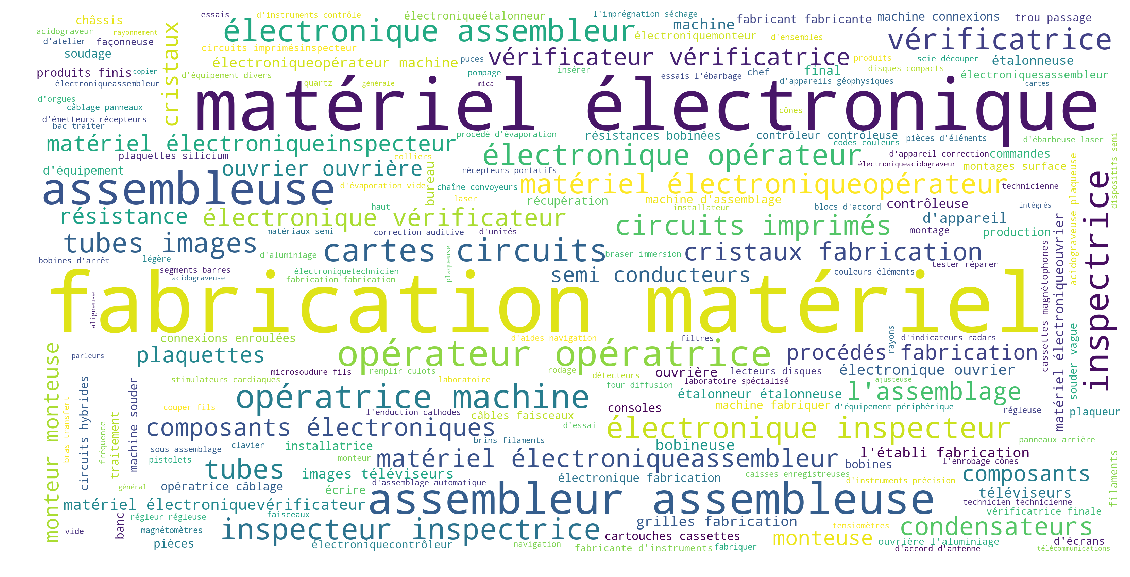

In [7]:
get_estimate(sub = [20,22], path = 'CNP9/emplois', pal=('hls', 4))
get_salary(sub = [20,22], path = 'CNP9/salaires', pal=('hls', 4))
get_gender_gap(sub = [21,22], path = 'CNP9/hommes-femmes')
get_word_cloud(path='CNP9', id_l=['9222', '9523'])